# **Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataset = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/House price prediction/housing.csv")

Data Exploration

In [ ]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
dataset.shape

(20640, 10)

In [ ]:
#drop the null values
dataset.dropna(inplace = True) #inplace save the result in data object again

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#split data int input and output and y
x = dataset.drop(['median_house_value'], axis = 1)
y = dataset['median_house_value']

In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [ ]:
#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [ ]:
train_data = x_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9040,-118.09,34.68,4.0,23386.0,4171.0,10493.0,3671.0,4.0211,INLAND,144000.0
10291,-117.83,33.87,5.0,6971.0,1449.0,3521.0,1423.0,5.2131,<1H OCEAN,243900.0
5226,-118.25,33.93,36.0,2452.0,734.0,2664.0,667.0,0.9298,<1H OCEAN,100000.0
3395,-118.30,34.26,40.0,1065.0,214.0,605.0,183.0,4.1964,<1H OCEAN,185900.0
10926,-117.89,33.74,32.0,1562.0,365.0,2145.0,347.0,2.9167,<1H OCEAN,158400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

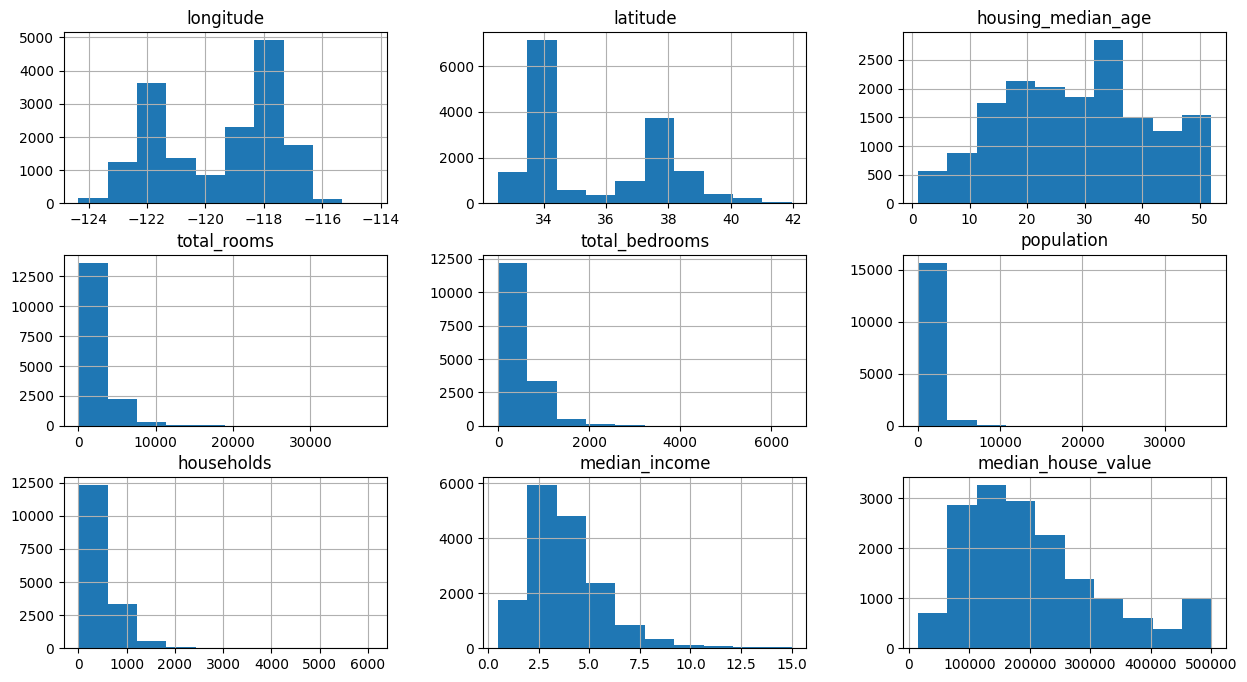

In [ ]:
train_data.hist(figsize = (15, 8))

<Axes: >

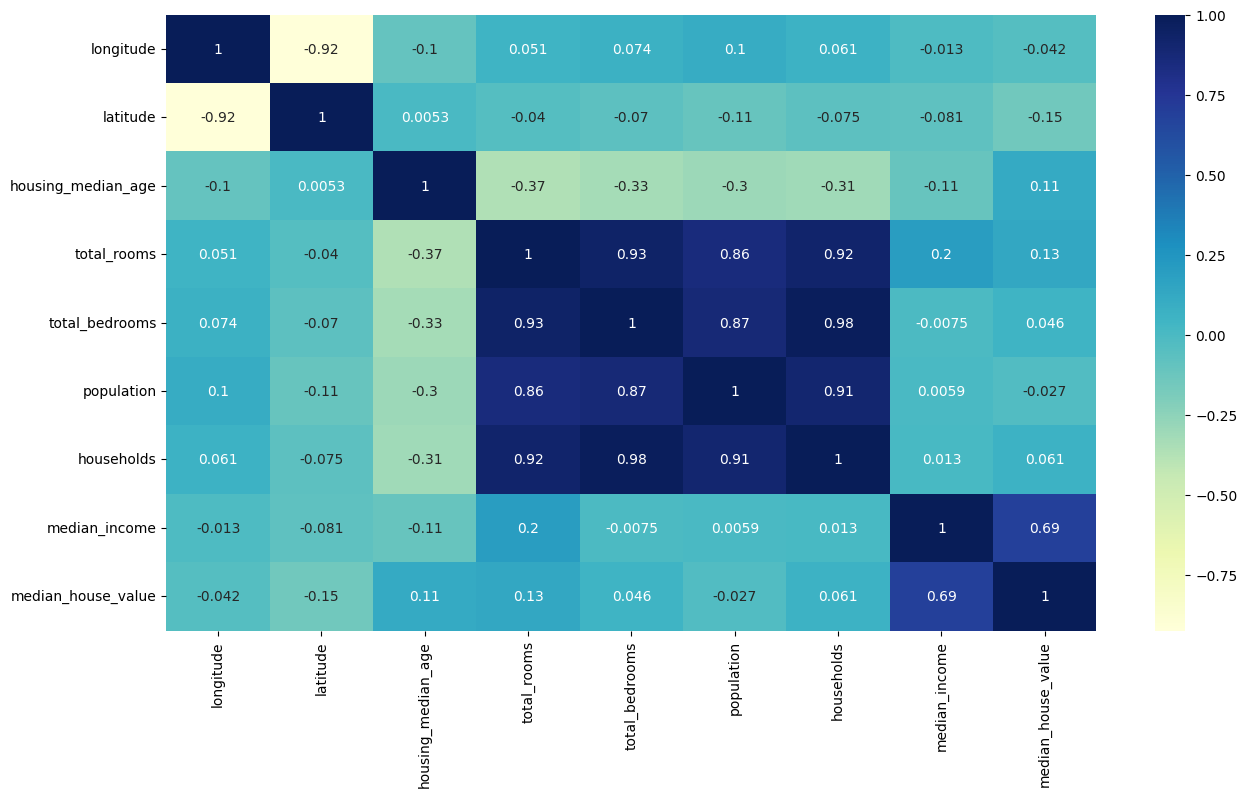

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu') #relation as a diagram

# **Data Preprocessing**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

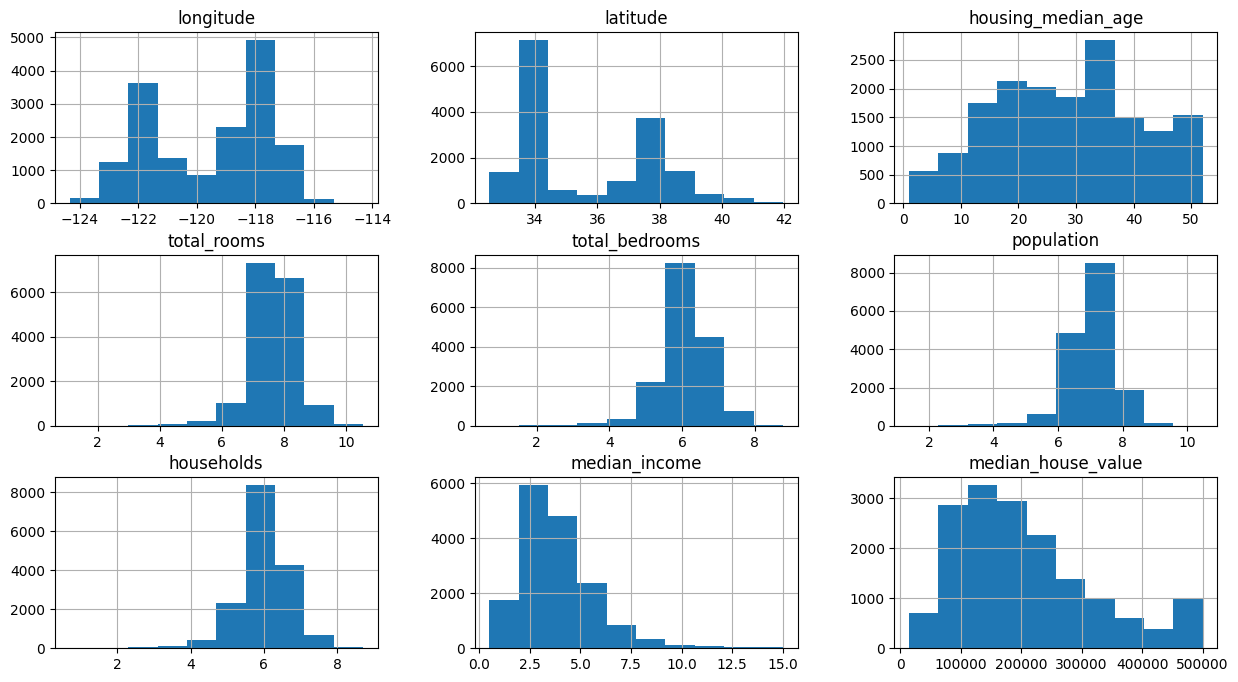

In [ ]:
#computes the natural logarithm (log) for feature scaling or normalization purposes.
#The reason for adding 1 to the values before taking the log is to avoid issues with zero or negative values. log(0) is undefined, and log(negative number) is not real.
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize = (15, 8))

In [ ]:
train_data['ocean_proximity'].value_counts()
# the same thing -> train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7216
INLAND,5211
NEAR OCEAN,2084
NEAR BAY,1831
ISLAND,4


In [ ]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9040,False,True,False,False,False
10291,True,False,False,False,False
5226,True,False,False,False,False
3395,True,False,False,False,False
10926,True,False,False,False,False
...,...,...,...,...,...
10911,True,False,False,False,False
9330,False,False,False,True,False
12942,False,True,False,False,False
10916,True,False,False,False,False


In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

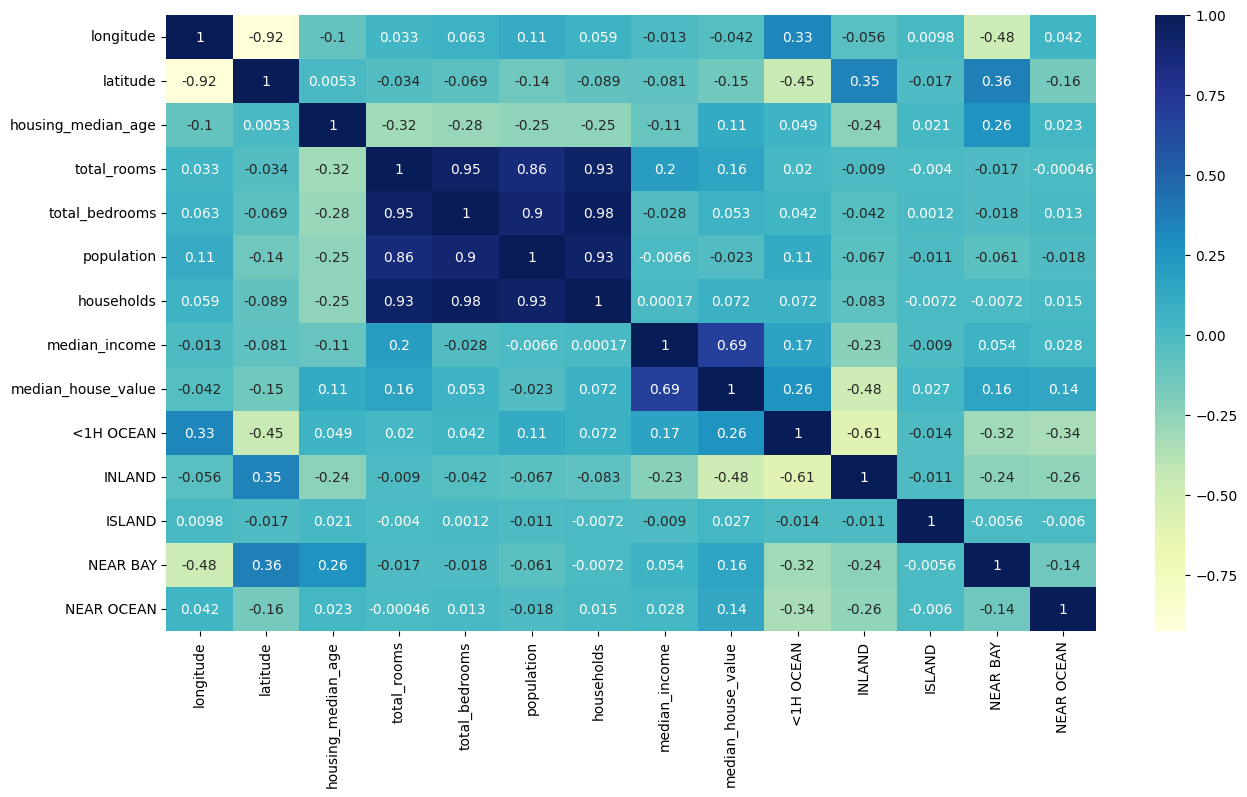

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

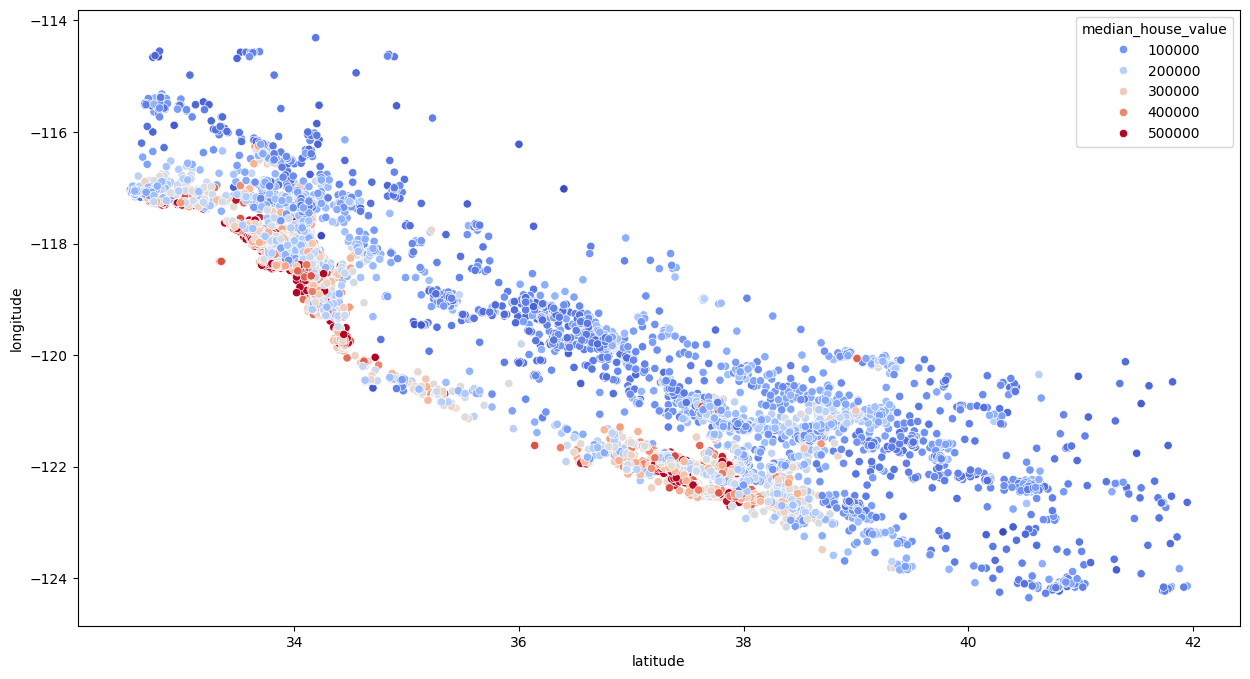

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

The more red it gets the more expensive the houses and the more blue it is the less expensive the houses

# **Feature Engineering**

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

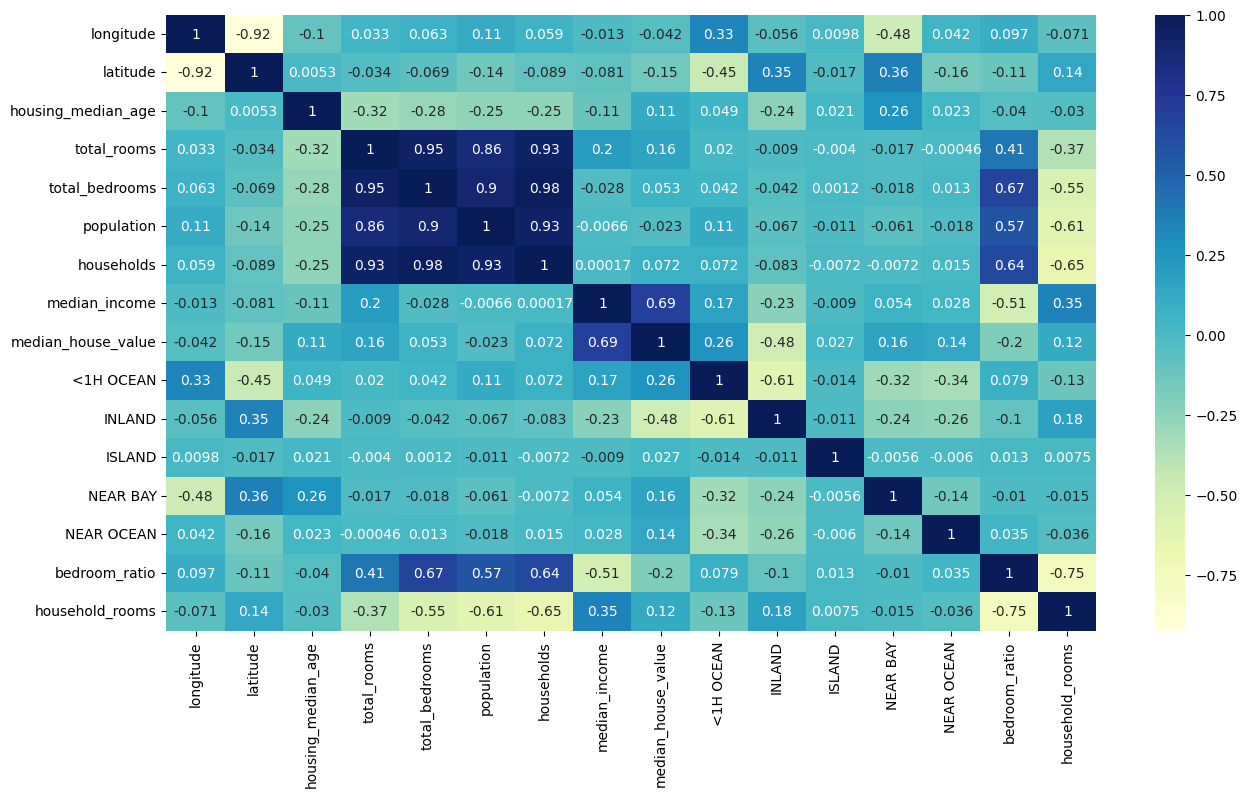

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaller.fit_transform(x_train) #we do't want to scale the output usually

reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
test_data = x_test.join(y_test)

#computes the natural logarithm (log) for feature scaling or normalization purposes.
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [ ]:
x_test_s = scaller.fit_transform(x_test)

In [ ]:
reg.score(x_test_s, y_test)

0.6590864026508885

*   0.6812873779198946 -> Not too bad and not too good
*   when using the standard scaller it does't scale down -> no difference

In [ ]:
# Calculate R-squared
y_pred = reg.predict(x_test_s)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.66


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: ${rmse:.2f}')

RMSE: $67227.03


# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forst = RandomForestRegressor()

forst.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forst.score(x_test, y_test)

0.8103476695609539

In [79]:
# Calculate R-squared
y_pred = forst.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.81


In [80]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: ${rmse:.2f}')

RMSE: $50141.90


In [81]:
dataset["median_house_value"].mean()

206864.41315519012

In [72]:
'''
from sklearn.model_selection import GridSearchCV
#cv for cross validations

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}

grid_search = GridSearchCV(forst, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) #scoring neg -> because we need a positive score

grid_search.fit(x_train, y_train)
'''

"\nfrom sklearn.model_selection import GridSearchCV\n#cv for cross validations\n\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'min_samples_split': [2, 4],\n    'max_depth': [None, 4, 8]\n}\n\ngrid_search = GridSearchCV(forst, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) #scoring neg -> because we need a positive score\n\ngrid_search.fit(x_train, y_train)\n"

In [73]:
#grid_search.best_estimator_

In [74]:
#best_forest = grid_search.best_estimator_

In [75]:
#best_forest.score(x_test, y_test)